In [26]:
# For plotting
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# For matrix math
import numpy as np
# For normalization + probability density function computation
from scipy import stats
# Plot style
%matplotlib notebook
# Set plot size in notebook
plt.rcParams["figure.figsize"] = (5, 5)

In [27]:
# Import a Dataset used for Novelty Detection
glass = pd.read_csv("../2.Data/Glass_Data.csv")
glass.head(n=5)

,refractive index,sodium oxide,magnesium oxide,aluminum oxide,silicon oxide,potassium oxide,calcium oxide,barium oxide,iron oxide,type
0,1.51761,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


## Plot 2 Dimensions of it (Scatter)
dim1 = 'calcium oxide'
dim2 = 'sodium oxide'

sns.regplot(x=dim1,y=dim2,data=glass,fit_reg=False)
plt.show()

In [29]:
# Estimate the mean and covariance with clean training data

# Take only these 2 Dimensions
dataset = glass[[dim1,dim2]].values
labels = glass[['type']].values

# Separate training data (clean)
# Slice class 6 and equal instances of class 1 out of the data set
X_train = np.append(dataset[9:176],dataset[185:], axis=0)
Y_train = np.append(labels[9:176],labels[185:])

# Test data (polluted)
X_test = np.append(dataset[:9],dataset[176:185], axis=0)
Y_test = np.append(labels[:9],labels[176:185])

# Print the labels to verify correct slicing
print("Dimension Training Data: ", X_train.shape)
print(Y_train)
print("Dimension Test Data: ", X_test.shape)
print(Y_test)


Dimension Training Data:  (196, 2)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 5 5 5 5 5 5 5 5 5 5 5 5 5 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7]
Dimension Test Data:  (18, 2)
[1 1 1 1 1 1 1 1 1 6 6 6 6 6 6 6 6 6]


In [30]:
# Calculate trained density function parameters and print them
meanVector = np.mean(X_train,axis=0)
covMatrix = np.cov(X_train.T)
print(meanVector)
print(covMatrix)

[ 8.9752551  13.35020408]
[[ 2.0856466  -0.3294221 ]
 [-0.3294221   0.59976509]]


<IPython.core.display.Javascript object>


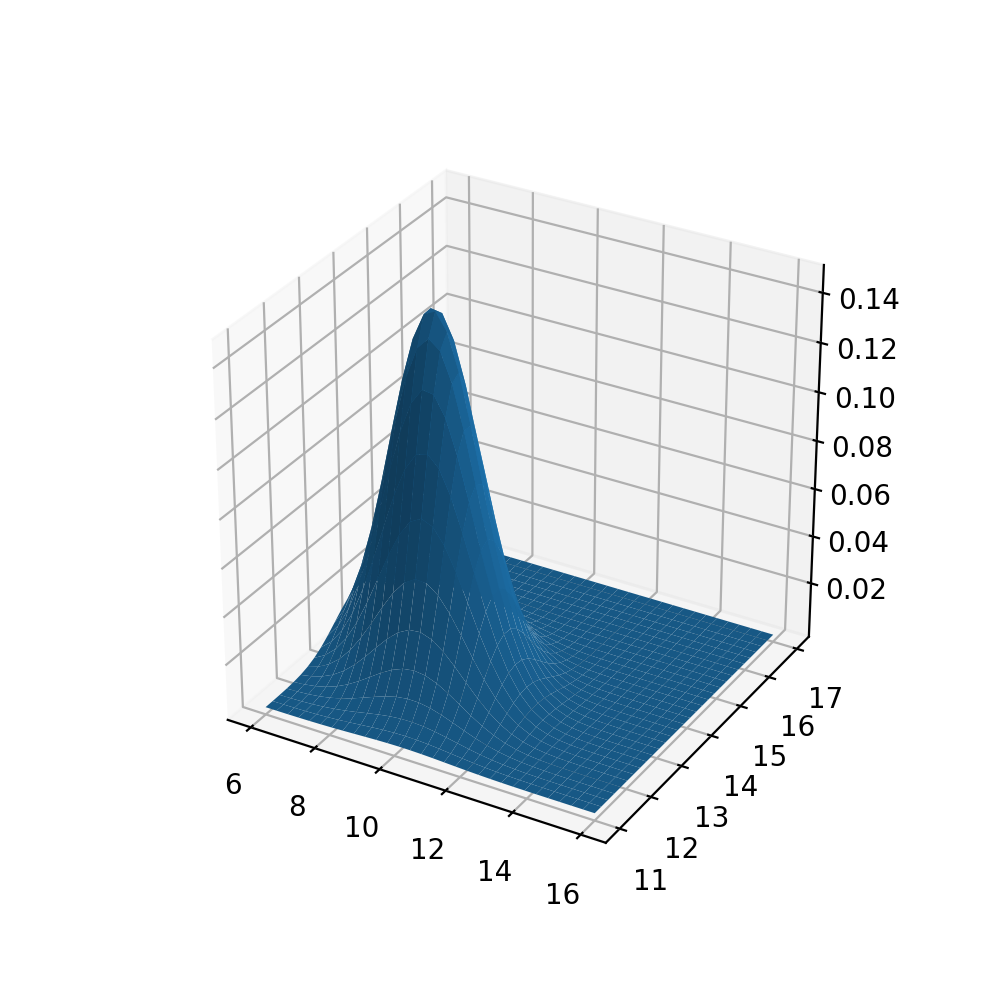

In [31]:
# Plot the Gauss

# Import 3D-Tools
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

# Correct Grid
xaxis, yaxis = np.mgrid[6:16:30j, 11.0:17.0:30j]
xy = np.column_stack([xaxis.flat, yaxis.flat])

# Use the mean and covariance 
z = multivariate_normal.pdf(xy, mean=meanVector, cov=covMatrix)

# Argument must be 2-Dimensional
z = z.reshape(xaxis.shape)

# Plot!
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xaxis,yaxis,z)
#ax.plot_wireframe(xaxis,yaxis,z)
plt.show()

In [85]:
# Apply cutoff to polluted test data
cutoff = 0.09
outliercount = 0
normalcount = 0

for i in range(X_test.shape[0]):
    pdfvalue = multivariate_normal.pdf(X_test[i],
                                       mean=meanVector,
                                       cov=covMatrix)
    if pdfvalue < cutoff:
        print(X_train[i],pdfvalue,"outlier")
        outliercount = outliercount + 1
    else:
        print(X_train[i],pdfvalue,"normal")
        normalcount = normalcount + 1

[ 8.4 13. ] 0.13867917463915624 normal
[ 8.09 12.72] 0.09666939826548396 normal
[ 8.56 12.8 ] 0.10571595836166811 normal
[ 8.05 12.88] 0.12213243328996855 normal
[ 8.38 12.86] 0.11690852352635347 normal
[ 8.5  12.61] 0.07790449705520644 outlier
[ 8.39 12.81] 0.12385904697808973 normal
[ 8.7  12.68] 0.11938745305827869 normal
[ 9.15 14.36] 0.09786525909218284 normal
[ 8.89 13.9 ] 0.08256510024167225 outlier
[ 8.44 13.02] 0.09559896044662591 normal
[ 8.52 12.82] 0.04323283133675518 outlier
[ 9.   14.77] 0.08136750135366524 outlier
[ 8.7  12.78] 0.050044405014654236 outlier
[ 8.59 12.81] 0.006286425445192427 outlier
[ 8.43 13.38] 0.020649840705631386 outlier
[ 8.53 12.98] 0.004765566096838831 outlier
[ 8.43 13.21] 1.958860761613039e-07 outlier


In [83]:
# Generate confusion matrix:
tp = 0
fn = 0
tn = 0
fp = 0
results = np.empty((X_test.shape[0],1),dtype='object')

for i in range(X_test.shape[0]):
    pdfvalue = multivariate_normal.pdf(X_test[i], mean=meanVector, cov=covMatrix)
    
    if i < X_test.shape[0]/2 and pdfvalue >= cutoff:
        tp = tp + 1
        results[i] = "True Positive"
    if i < X_test.shape[0]/2 and pdfvalue < cutoff:
        fn = fn + 1
        results[i] = "False Negative"
    if i >= X_test.shape[0]/2 and pdfvalue < cutoff:
        tn = tn + 1
        results[i] = "True Negative"
    if i >= X_test.shape[0]/2 and pdfvalue >= cutoff:
        fp = fp + 1
        results[i] = "False Positive"

print("Confusion Matrix:\n",tp,fp,"\n",fn,tn)

Confusion Matrix:
 8 1 
 1 8


In [84]:
# F1 Score
f1 = (2*tp)/(2*tp+fp+fn)
print(f1)

0.8888888888888888


<IPython.core.display.Javascript object>


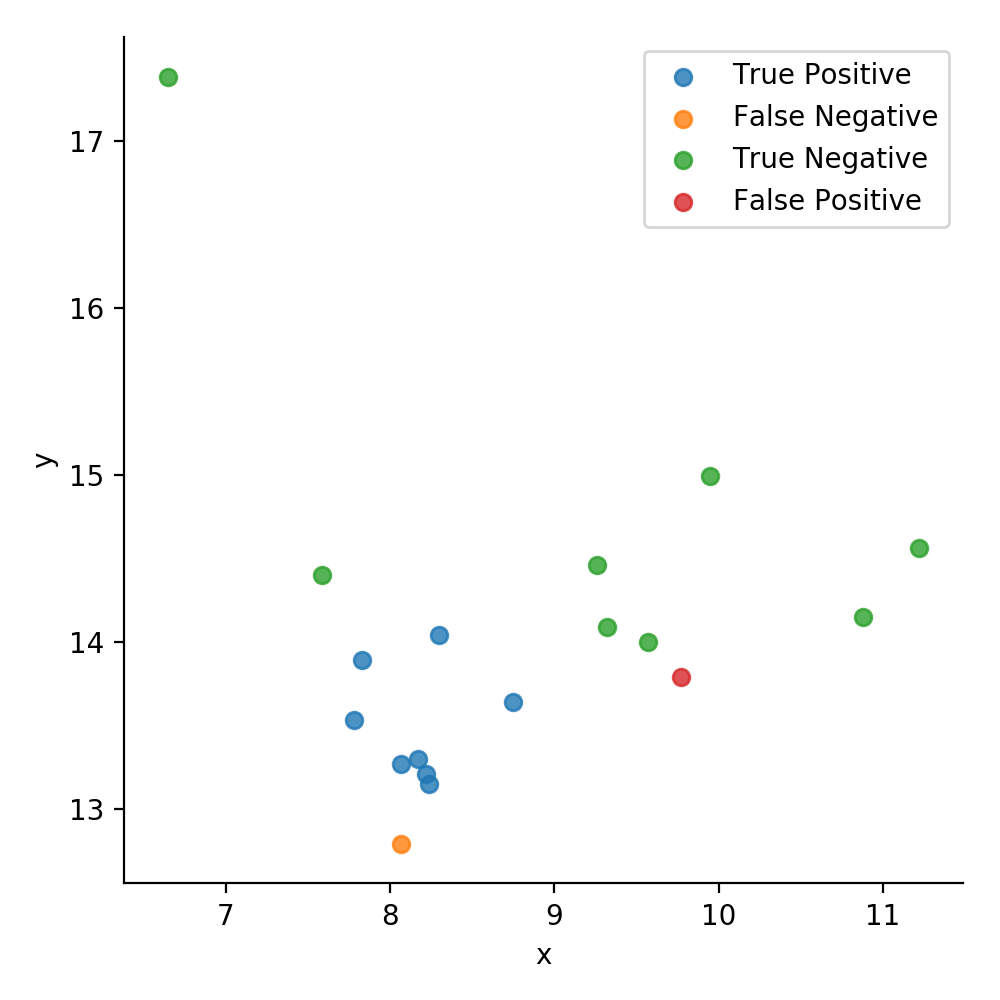

In [81]:
# Plot the result
points = pd.DataFrame(X_test,columns=['x','y'])
values = pd.DataFrame(results,columns=['values'])
plot = points.join(values)
plot.head()
sns.lmplot(x='x', y='y', data=plot, fit_reg=False, hue='values', legend=False,)
plt.legend(loc='upper right')
plt.show()